In [1]:
import warnings
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [2]:
# Original dataset path
# origial_dataset_dir = '/home/nima/DataSets/Dogs_VS_Cats/train'
origial_dataset_dir = '/kaggle/input/dogs-vs-cats/train/train'
# directory to copy data into it
# base_dir = '/home/nima/MY_JUPYTER/Train/Deep/Dogs-VS-Cats'
base_dir = '/kaggle/working/'

In [3]:
# Create train, validation and test folder
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create folders
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [4]:
# Createt cats and dogs folder in each recent folders
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

2000 train ----------> 1000 cats + 1000 dogs  
1000 validation -----> 500 cats + 500 dogs  
1000 test -----------> 500 cats + 500 dogs  

#### Copy cats image

In [5]:
# Copy 1000 cats image to train/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 cats image to validatinon/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 cats image to test/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dts)

#### Copy dogs image

In [6]:
# Copy 1000 dogs image to train/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 dogs image to validatinon/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 dogs image to test/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dts)

In [7]:
# Counts number of images in each folder
print('Total training cat images : ', len(os.listdir(train_cats_dir)))
print('Total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('Total test cat images : ', len(os.listdir(test_cats_dir)))
print('_' * 45)
print('Total training dog images : ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images : ', len(os.listdir(validation_dogs_dir)))
print('Total test dog images : ', len(os.listdir(test_dogs_dir)))

Total training cat images :  1000
Total validation cat images :  500
Total test cat images :  500
_____________________________________________
Total training dog images :  1000
Total validation dog images :  500
Total test dog images :  500


In [8]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [9]:
datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 20

def extract_features(directory, sample_count) :
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='binary'
    )
    i=0
    for input_batch, label_batch in generator :
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = label_batch
        i += 1
        if i * batch_size >= sample_count :
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 20ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 23ms/step


In [10]:
print('train shape before :      ', train_features.shape)
print('validation shape before : ', validation_features.shape)
print('test shape before :       ', test_features.shape)

train shape before :       (2000, 4, 4, 512)
validation shape before :  (1000, 4, 4, 512)
test shape before :        (1000, 4, 4, 512)


In [11]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [12]:
print('train shape after :      ', train_features.shape)
print('validation shape after : ', validation_features.shape)
print('test shape after :       ', test_features.shape)

train shape after :       (2000, 8192)
validation shape after :  (1000, 8192)
test shape after :        (1000, 8192)


In [13]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_dim=4*4*512))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])


history1 = model1.fit(train_features, train_labels,
                    epochs=30, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels)
                   )

Epoch 1/30
100/100 [==============================] - 2s 6ms/step - loss: 0.6525 - acc: 0.6500 - val_loss: 0.5105 - val_acc: 0.7440
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4985 - acc: 0.7565 - val_loss: 0.4500 - val_acc: 0.7920
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4127 - acc: 0.8090 - val_loss: 0.4172 - val_acc: 0.8100
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3680 - acc: 0.8310 - val_loss: 0.4308 - val_acc: 0.8020
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3323 - acc: 0.8490 - val_loss: 0.4069 - val_acc: 0.8160
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3056 - acc: 0.8685 - val_loss: 0.4308 - val_acc: 0.8070
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2840 - acc: 0.8795 - val_loss: 0.3990 - val_acc: 0.8180
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

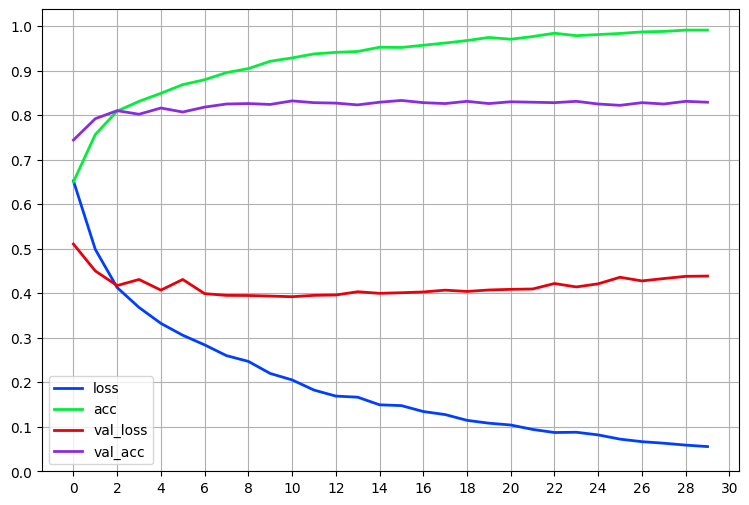

In [14]:
pd.DataFrame(history1.history).plot(figsize=(9, 6), linewidth=2)
plt.xticks(range(0, 31, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [15]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 18910017 (72.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Freeze conv_base

In [17]:
print('number of trainable weights before freezeing: ', len(model2.trainable_weights))

conv_base.trainable = False

print('number of trainable weights after freezeing: ', len(model2.trainable_weights))

number of trainable weights before freezeing:  30
number of trainable weights after freezeing:  4


In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Compile
model2.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

In [20]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 15s 140ms/step - loss: 0.6217 - acc: 0.6545 - val_loss: 0.4862 - val_acc: 0.7770
Epoch 2/30
100/100 [==============================] - 14s 140ms/step - loss: 0.5158 - acc: 0.7480 - val_loss: 0.4298 - val_acc: 0.7980
Epoch 3/30
100/100 [==============================] - 14s 140ms/step - loss: 0.4935 - acc: 0.7490 - val_loss: 0.4594 - val_acc: 0.7780
Epoch 4/30
100/100 [==============================] - 14s 141ms/step - loss: 0.4635 - acc: 0.7745 - val_loss: 0.4027 - val_acc: 0.8060
Epoch 5/30
100/100 [==============================] - 14s 139ms/step - loss: 0.4673 - acc: 0.7775 - val_loss: 0.4050 - val_acc: 0.8110
Epoch 6/30
100/100 [==============================] - 14s 141ms/step - loss: 0.4607 - acc: 0.7885 - val_loss: 0.3883 - val_acc: 0.8210
Epoch 7/30
100/100 [==============================] - 14s 138ms/step - loss: 0.4305 - acc: 0.8075 - val_loss: 0.3818 - val_acc: 0.8270
Epoch 8/30
100/100 [==============================] - 1

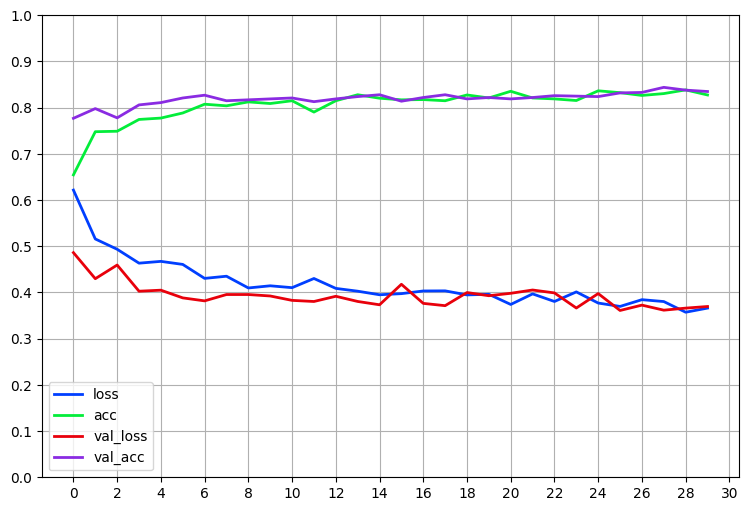

In [21]:
pd.DataFrame(history2.history).plot(figsize=(9, 6), linewidth=2)
plt.xticks(range(0, 31, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [22]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [23]:
for layer in conv_base.layers :
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [24]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers :
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [25]:
# Compile
model3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

history3 = model3.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 16s 142ms/step - loss: 0.6152 - acc: 0.6530 - val_loss: 0.4734 - val_acc: 0.7560
Epoch 2/30
100/100 [==============================] - 14s 139ms/step - loss: 0.4972 - acc: 0.7650 - val_loss: 0.4042 - val_acc: 0.8100
Epoch 3/30
100/100 [==============================] - 14s 140ms/step - loss: 0.4315 - acc: 0.8005 - val_loss: 0.3583 - val_acc: 0.8380
Epoch 4/30
100/100 [==============================] - 14s 141ms/step - loss: 0.4121 - acc: 0.8085 - val_loss: 0.3544 - val_acc: 0.8420
Epoch 5/30
100/100 [==============================] - 14s 140ms/step - loss: 0.3788 - acc: 0.8225 - val_loss: 0.3397 - val_acc: 0.8530
Epoch 6/30
100/100 [==============================] - 14s 139ms/step - loss: 0.3585 - acc: 0.8375 - val_loss: 0.3479 - val_acc: 0.8460
Epoch 7/30
100/100 [==============================] - 14s 139ms/step - loss: 0.3350 - acc: 0.8520 - val_loss: 0.3184 - val_acc: 0.8610
Epoch 8/30
100/100 [==============================] - 1

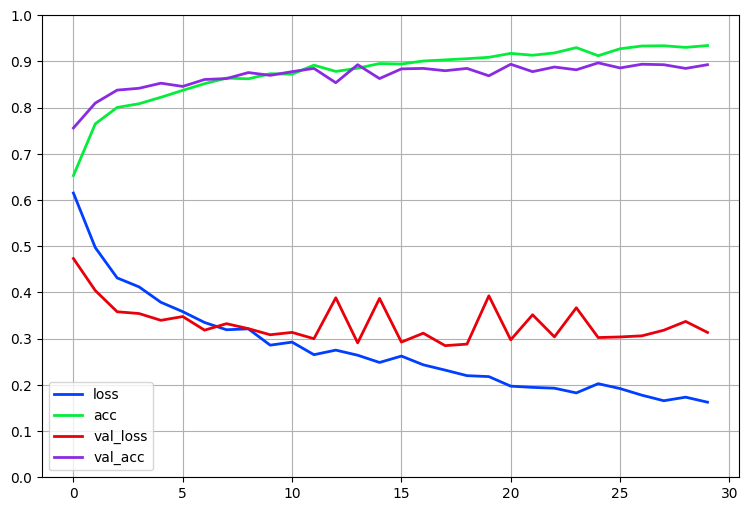

In [26]:
pd.DataFrame(history3.history).plot(figsize=(9, 6), linewidth=2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model3.evaluate(test_generator, steps=50)
print('test acc : ', test_loss)
print('test loss : ', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 2s 31ms/step - loss: 0.3635 - acc: 0.8790
test acc :  0.3635416328907013
test loss :  0.8790000081062317


In [28]:
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='elu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [29]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers :
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [30]:
# Compile
model4.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

history4 = model3.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 14s 141ms/step - loss: 0.1523 - acc: 0.9375 - val_loss: 0.3613 - val_acc: 0.8840
Epoch 2/30
100/100 [==============================] - 14s 138ms/step - loss: 0.1522 - acc: 0.9390 - val_loss: 0.4557 - val_acc: 0.8690
Epoch 3/30
100/100 [==============================] - 14s 139ms/step - loss: 0.1417 - acc: 0.9435 - val_loss: 0.3192 - val_acc: 0.8950
Epoch 4/30
100/100 [==============================] - 14s 142ms/step - loss: 0.1325 - acc: 0.9460 - val_loss: 0.3179 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 14s 140ms/step - loss: 0.1398 - acc: 0.9420 - val_loss: 0.3312 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 14s 140ms/step - loss: 0.1405 - acc: 0.9500 - val_loss: 0.3231 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 14s 140ms/step - loss: 0.1448 - acc: 0.9390 - val_loss: 0.3894 - val_acc: 0.8870
Epoch 8/30
100/100 [==============================] - 1

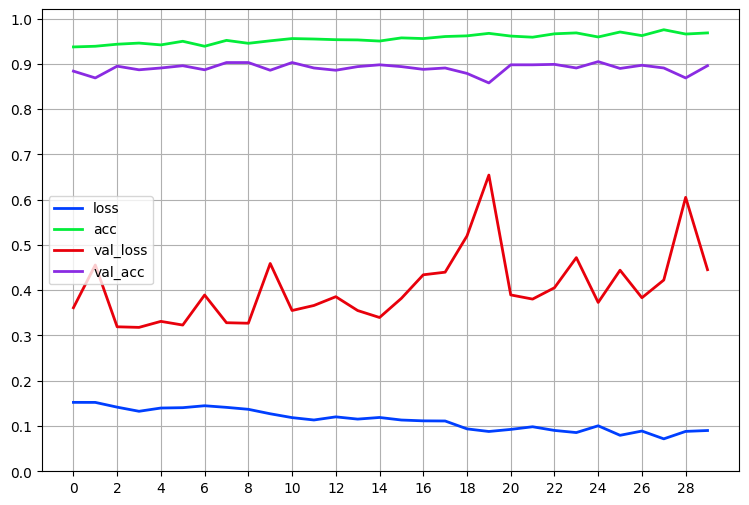

In [31]:
pd.DataFrame(history4.history).plot(figsize=(9, 6), linewidth=2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(0, 30, 2))
plt.grid()
plt.show()

Base on above plot, we can reach best performance with 5 epoch

In [32]:
test_loss, test_acc = model3.evaluate(test_generator, steps=50)
print('test acc : ', test_loss)
print('test loss : ', test_acc)

50/50 [==============================] - 2s 32ms/step - loss: 0.5502 - acc: 0.8700
test acc :  0.5502234697341919
test loss :  0.8700000047683716
